Epoch 1/30
469/469 - 5s - 10ms/step - accuracy: 0.8133 - loss: 0.5251 - val_accuracy: 0.8376 - val_loss: 0.4515
Epoch 2/30
469/469 - 4s - 9ms/step - accuracy: 0.8569 - loss: 0.3992 - val_accuracy: 0.8549 - val_loss: 0.4051
Epoch 3/30
469/469 - 5s - 10ms/step - accuracy: 0.8668 - loss: 0.3660 - val_accuracy: 0.8649 - val_loss: 0.3846
Epoch 4/30
469/469 - 4s - 9ms/step - accuracy: 0.8755 - loss: 0.3406 - val_accuracy: 0.8667 - val_loss: 0.3716
Epoch 5/30
469/469 - 4s - 9ms/step - accuracy: 0.8826 - loss: 0.3233 - val_accuracy: 0.8593 - val_loss: 0.3801
Epoch 6/30
469/469 - 5s - 10ms/step - accuracy: 0.8882 - loss: 0.3057 - val_accuracy: 0.8650 - val_loss: 0.3664
Epoch 7/30
469/469 - 4s - 9ms/step - accuracy: 0.8924 - loss: 0.2928 - val_accuracy: 0.8712 - val_loss: 0.3575
Epoch 8/30
469/469 - 4s - 9ms/step - accuracy: 0.8967 - loss: 0.2809 - val_accuracy: 0.8791 - val_loss: 0.3411
Epoch 9/30
469/469 - 4s - 9ms/step - accuracy: 0.9005 - loss: 0.2706 - val_accuracy: 0.8791 - val_loss: 0.335

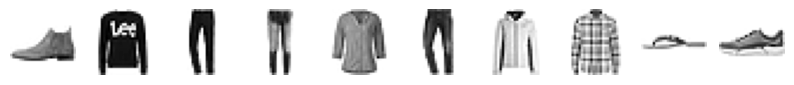

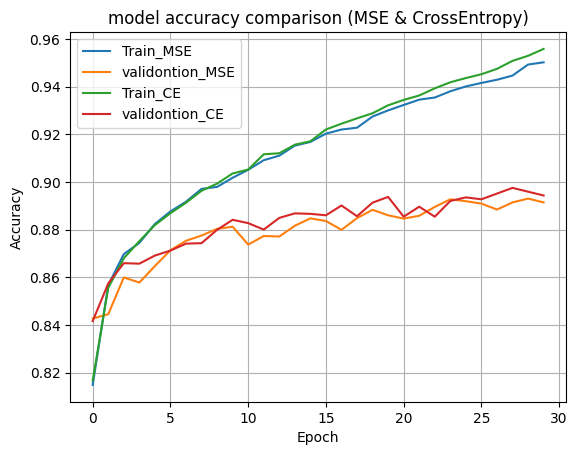

"\nplt.plot(hist_CE.history['loss'])\nplt.plot(hist_CE.history['val_loss'])\nplt.title('Model loss')\nplt.xlabel('loss')\nplt.ylabel('Accuracy')\nplt.legend(['Train', 'Validation'], loc = 'upper right')\nplt.grid()\nplt.show()\n"

In [4]:
# 15.MLP_FASHION_4hid_glorot.py

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt 

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_copy = np.copy(x_test[:10])


x_train = x_train.reshape(60000,784)  # 3D --> 2D  reshaping
x_test = x_test.reshape(10000,784)

x_train = x_train.astype(np.float32)/255.0 # nomarlization
x_test = x_test.astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train, 10) # to one-hot enc
y_test = tf.keras.utils.to_categorical(y_test, 10)

n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

mlp_TANH = Sequential()
# input to hidden layer 1 


mlp_TANH.add(Dense(units=n_hidden1, activation='tanh',
              input_shape=(n_input,)))
# hidden to layer 1 to hidden layer 2 
mlp_TANH.add(Dense(units=n_hidden2, activation='tanh'))
# hidden to layer 2 to hidden layer 3 
mlp_TANH.add(Dense(units=n_hidden3, activation='tanh'))
# hidden to layer 3 to hidden layer 4 
mlp_TANH.add(Dense(units=n_hidden4, activation='tanh'))
# hidden to layer 4 to output layer
mlp_TANH.add(Dense(units=n_output, activation='softmax'))


mlp_TANH.compile(loss='categorical_crossentropy',
            optimizer=Adam(learning_rate=0.0001),
            metrics=['accuracy'])

hist_TANH = mlp_TANH.fit(x_train, y_train,batch_size=128,
               epochs=30, validation_data=(x_test,y_test),
               verbose=2)

res_TANH = mlp_MSE.evaluate(x_test, y_test,verbose=0)
print("MSE(MeanSquaredError)의 정확율 = ",res_TANH[1]*100)

mlp_ReLU = Sequential()
# input to hidden layer 1 


mlp_ReLU.add(Dense(units=n_hidden1, activation='relu',
              input_shape=(n_input,)))
# hidden to layer 1 to hidden layer 2 
mlp_ReLU.add(Dense(units=n_hidden2, activation='relu'))
# hidden to layer 2 to hidden layer 3 
mlp_ReLU.add(Dense(units=n_hidden3, activation='relu'))
# hidden to layer 3 to hidden layer 4 
mlp_ReLU.add(Dense(units=n_hidden4, activation='relu'))
# hidden to layer 4 to output layer
mlp_ReLU.add(Dense(units=n_output, activation='softmax'))


mlp_ReLU.compile(loss='categorical_crossentropy',
            optimizer=Adam(learning_rate=0.0001),
            metrics=['accuracy'])
# MES로 훈련하기
hist_ReLU = mlp_ReLU.fit(x_train, y_train,batch_size=128,
               epochs=30, validation_data=(x_test,y_test),
               verbose=2)

res_ReLU = mlp_ReLU.evaluate(x_test, y_test,verbose=0)
print("CrossEntropy의 정확율 = ",res_ReLU[1]*100)

### 실제로 예측해보기 ###
# rlt = mlp_TANH.predict(x_test)
# print(rlt_TANH[:10])
# print("정답은 : ", np.argmax(rlt_TANH[:10], axis=1))

fig, axs = plt.subplots(1,10,figsize=(10,10))
for i in range(10):
    axs[i].imshow(x_copy[i], cmap='gray_r')
    axs[i].axis('off')
    
plt.show()

plt.plot(hist_MSE.history['accuracy'])
plt.plot(hist_MSE.history['val_accuracy'])

plt.plot(hist_CE.history['accuracy'])
plt.plot(hist_CE.history['val_accuracy'])

plt.title('model accuracy comparison (MSE & CrossEntropy)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_MSE', 'validontion_MSE','Train_CE', 'validontion_CE'], loc ='best')
plt.grid()
plt.show()


Epoch 1/50
235/235 - 2s - 10ms/step - accuracy: 0.2372 - loss: 2.2299 - val_accuracy: 0.3873 - val_loss: 2.1299
Epoch 2/50
235/235 - 2s - 9ms/step - accuracy: 0.5080 - loss: 2.0267 - val_accuracy: 0.5790 - val_loss: 1.9199
Epoch 3/50
235/235 - 2s - 10ms/step - accuracy: 0.6166 - loss: 1.7958 - val_accuracy: 0.6264 - val_loss: 1.6728
Epoch 4/50
235/235 - 2s - 10ms/step - accuracy: 0.6500 - loss: 1.5433 - val_accuracy: 0.6424 - val_loss: 1.4284
Epoch 5/50
235/235 - 2s - 10ms/step - accuracy: 0.6611 - loss: 1.3196 - val_accuracy: 0.6540 - val_loss: 1.2347
Epoch 6/50
235/235 - 2s - 9ms/step - accuracy: 0.6719 - loss: 1.1532 - val_accuracy: 0.6672 - val_loss: 1.0979
Epoch 7/50
235/235 - 2s - 9ms/step - accuracy: 0.6871 - loss: 1.0369 - val_accuracy: 0.6815 - val_loss: 1.0023
Epoch 8/50
235/235 - 2s - 10ms/step - accuracy: 0.7024 - loss: 0.9543 - val_accuracy: 0.6973 - val_loss: 0.9336
Epoch 9/50
235/235 - 2s - 10ms/step - accuracy: 0.7176 - loss: 0.8937 - val_accuracy: 0.7108 - val_loss: 0.

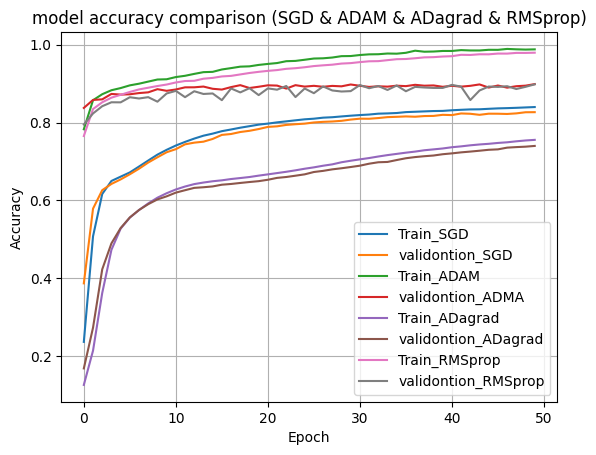

In [6]:
# 16.MLP_Fashion_4hid_glorot.py

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop

import matplotlib.pyplot as plt 

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_copy = np.copy(x_test[:10])


x_train = x_train.reshape(60000,784)  # 3D --> 2D  reshaping
x_test = x_test.reshape(10000,784)

x_train = x_train.astype(np.float32)/255.0 # nomarlization
x_test = x_test.astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train, 10) # to one-hot enc
y_test = tf.keras.utils.to_categorical(y_test, 10)

n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10
bat_size=256
n_epochs=50

def Model_make():
    model = Sequential()
    model.add(Dense(units=n_hidden1, activation='relu', input_shape=(n_input,)))
    # hidden to layer 1 to hidden layer 2 
    model.add(Dense(units=n_hidden2, activation='relu'))
    # hidden to layer 2 to hidden layer 3 
    model.add(Dense(units=n_hidden3, activation='relu'))
    # hidden to layer 3 to hidden layer 4 
    model.add(Dense(units=n_hidden4, activation='relu'))
    # hidden to layer 4 to output layer
    model.add(Dense(units=n_output, activation='softmax'))

    return model

#      ======= SGD 이용 훈련 시스템 =======
mlp_SGD = Model_make()

mlp_SGD.compile(loss='categorical_crossentropy',
            optimizer=SGD(learning_rate=0.001),
            metrics=['accuracy'])

hist_SGD = mlp_SGD.fit(x_train, y_train,batch_size=bat_size,
               epochs=n_epochs, validation_data=(x_test,y_test),
               verbose=2)

res_SGD = mlp_SGD.evaluate(x_test, y_test,verbose=0)
print("CrossEntropy의 정확율 = ",res_SGD[1]*100)

#      ======= ADAM 이용 훈련 시스템 =======
mlp_ADAM = Model_make()

mlp_ADAM.compile(loss='categorical_crossentropy',
            optimizer=Adam(learning_rate=0.0001),
            metrics=['accuracy'])

hist_ADAM = mlp_ADAM.fit(x_train, y_train,batch_size=bat_size,
               epochs=n_epochs, validation_data=(x_test,y_test),
               verbose=2)

res_ADAM = mlp_ADAM.evaluate(x_test, y_test,verbose=0)
print("CrossEntropy의 정확율 = ",res_ADAM[1]*100)

#      ======= ADagrad 이용 훈련 시스템 =======
mlp_ADagrad = Model_make()

mlp_ADagrad.compile(loss='categorical_crossentropy',
            optimizer=Adagrad(learning_rate=0.0001),
            metrics=['accuracy'])

hist_ADagrad = mlp_ADagrad.fit(x_train, y_train,batch_size=bat_size,
               epochs=n_epochs, validation_data=(x_test,y_test),
               verbose=2)

res_ADagrad = mlp_ADagrad.evaluate(x_test, y_test,verbose=0)
print("CrossEntropy의 정확율 = ",res_ADagrad[1]*100)

#      ======= RMSporp 이용 훈련 시스템 =======
mlp_RMSprop = Model_make()

mlp_RMSprop.compile(loss='categorical_crossentropy',
            optimizer=RMSprop(learning_rate=0.0001),
            metrics=['accuracy'])

hist_RMSprop = mlp_RMSprop.fit(x_train, y_train,batch_size=bat_size,
               epochs=n_epochs, validation_data=(x_test,y_test),
               verbose=2)

res_RMSprop = mlp_RMSprop.evaluate(x_test, y_test,verbose=0)
print("CrossEntropy의 정확율 = ",res_RMSprop[1]*100)

# 내가 그린 기린 그림
plt.plot(hist_SGD.history['accuracy'])
plt.plot(hist_SGD.history['val_accuracy'])

plt.plot(hist_ADAM.history['accuracy'])
plt.plot(hist_ADAM.history['val_accuracy'])

plt.plot(hist_ADagrad.history['accuracy'])
plt.plot(hist_ADagrad.history['val_accuracy'])

plt.plot(hist_RMSprop.history['accuracy'])
plt.plot(hist_RMSprop.history['val_accuracy'])

plt.title('model accuracy comparison (SGD & ADAM & ADagrad & RMSprop)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_SGD', 'validontion_SGD','Train_ADAM', 'validontion_ADMA', 
            'Train_ADagrad', 'validontion_ADagrad','Train_RMSprop', 'validontion_RMSprop'], loc ='best')
plt.grid()
plt.show()
